# Insurance Claims- Fraud Detection


Problem Statement:
Business case:
Insurance fraud is a huge problem in the industry. It's difficult to identify fraud claims. Machine Learning is in a unique position to help the Auto Insurance industry with this problem.

In this project, you are provided a dataset which has the details of the insurance policy along with the customer details. It also has the details of the accident on the basis of which the claims have been made. 

In this example, you will be working with some auto insurance data to demonstrate how you can create a predictive model that predicts if an insurance claim is fraudulent or not. 

In [1]:
import numpy as np

import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv(r"insurance.csv",engine='python')

In [3]:
df.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN


In [4]:
df.shape

(1000, 40)

In [5]:
df.isnull().sum()

months_as_customer                0
age                               0
policy_number                     0
policy_bind_date                  0
policy_state                      0
policy_csl                        0
policy_deductable                 0
policy_annual_premium             0
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           0
insured_occupation                0
insured_hobbies                   0
insured_relationship              0
capital-gains                     0
capital-loss                      0
incident_date                     0
incident_type                     0
collision_type                    0
incident_severity                 0
authorities_contacted             0
incident_state                    0
incident_city                     0
incident_location                 0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
property_damage             

as _c39 isnt going to help so lets drop it.

In [6]:
df.drop(['_c39'],axis=1,inplace=True)
df.drop(['policy_number'],axis=1,inplace=True)
df.drop(['incident_location'],axis=1,inplace=True)

In [7]:
df.head()

,months_as_customer,age,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,17-10-2014,OH,250/500,1000,1406.91,0,466132,MALE,...,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y
1,228,42,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,MALE,...,0,?,5070,780,780,3510,Mercedes,E400,2007,Y
2,134,29,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,FEMALE,...,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N
3,256,41,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,FEMALE,...,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y
4,228,44,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,MALE,...,1,NO,6500,1300,650,4550,Accura,RSX,2009,N


so over all we hav almost 1000 records

no null values and gor rid of redundant columns

# EDA

__months_as_customer__

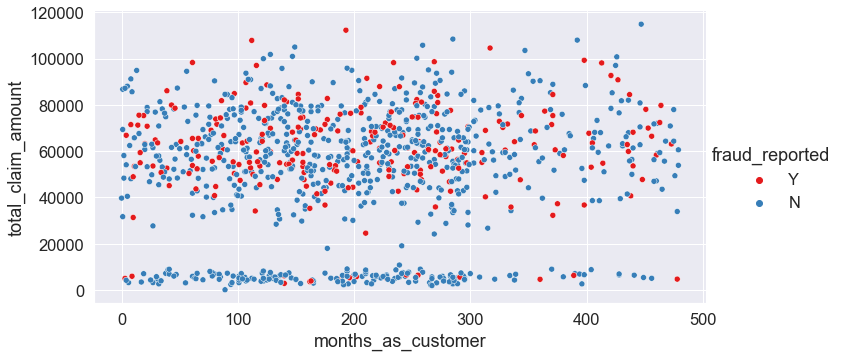

In [8]:
sns.set(font_scale=1.5)
sns.relplot(x='months_as_customer',y='total_claim_amount',hue='fraud_reported',data=df,aspect=2,palette='Set1')

From the above we can see that the majority of the claims was generated from customer who were from 100 to 350, and most of the insurance fraud was reported from new customers below 100.



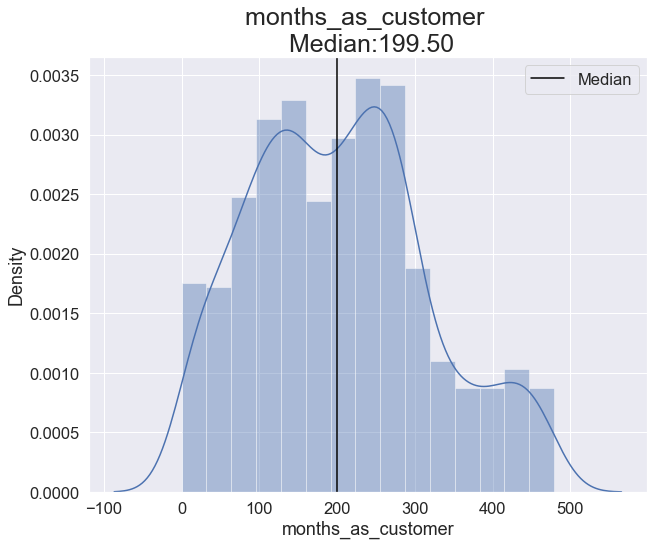

In [9]:
plt.figure(figsize=(10,8))
sns.distplot(df['months_as_customer'])
plt.title('months_as_customer \n Median:{0:.2f}'.format(df['months_as_customer'].median()),size=25)
plt.axvline(df['months_as_customer'].median(),color='black',label='Median')
plt.legend()

so average is almost 200 months for a customer is generated in above graph

In [10]:
df.head()

,months_as_customer,age,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,17-10-2014,OH,250/500,1000,1406.91,0,466132,MALE,...,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y
1,228,42,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,MALE,...,0,?,5070,780,780,3510,Mercedes,E400,2007,Y
2,134,29,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,FEMALE,...,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N
3,256,41,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,FEMALE,...,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y
4,228,44,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,MALE,...,1,NO,6500,1300,650,4550,Accura,RSX,2009,N


__age__

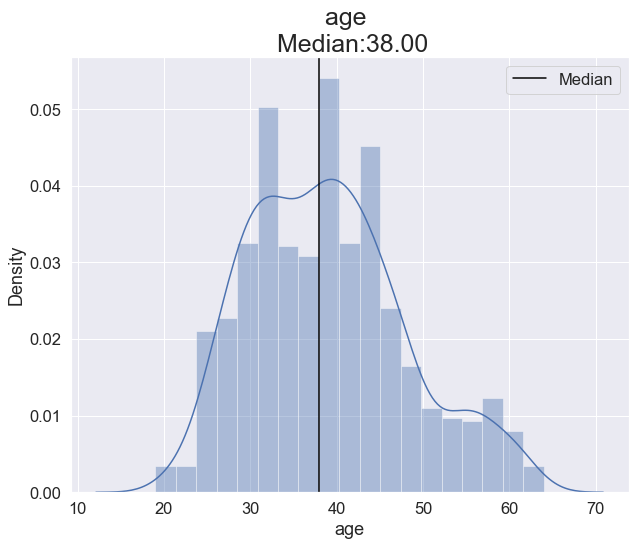

In [11]:
plt.figure(figsize=(10,8))
sns.distplot(df['age'])
plt.title('age \n Median:{0:.2f}'.format(df['age'].median()),size=25)
plt.axvline(df['age'].median(),color='black',label='Median')
plt.legend()

looks like formally distributed an age of customers is between 30-50 

In [12]:
df.age.value_counts()

43    49
39    48
41    45
34    44
30    42
31    42
38    42
37    41
33    39
32    38
40    38
29    35
46    33
35    32
36    32
42    32
44    32
28    30
45    26
26    26
48    25
47    24
27    24
57    16
25    14
49    14
55    14
50    13
53    13
61    10
24    10
54    10
60     9
51     9
58     8
56     8
23     7
21     6
59     5
62     4
52     4
64     2
63     2
22     1
20     1
19     1
Name: age, dtype: int64

In [13]:
df.head()

,months_as_customer,age,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,17-10-2014,OH,250/500,1000,1406.91,0,466132,MALE,...,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y
1,228,42,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,MALE,...,0,?,5070,780,780,3510,Mercedes,E400,2007,Y
2,134,29,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,FEMALE,...,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N
3,256,41,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,FEMALE,...,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y
4,228,44,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,MALE,...,1,NO,6500,1300,650,4550,Accura,RSX,2009,N


__policy_bind_day__

In [14]:
df['policy_bind_day'] = pd.to_datetime(df.policy_bind_date, format='%d-%m-%Y').dt.day
df['policy_bind_month'] = pd.to_datetime(df.policy_bind_date, format='%d-%m-%Y').dt.month
df['policy_bind_year']= pd.to_datetime(df.policy_bind_date, format='%d-%m-%Y').dt.year

In [15]:
df.head()

,months_as_customer,age,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,...,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,policy_bind_day,policy_bind_month,policy_bind_year
0,328,48,17-10-2014,OH,250/500,1000,1406.91,0,466132,MALE,...,6510,13020,52080,Saab,92x,2004,Y,17,10,2014
1,228,42,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,MALE,...,780,780,3510,Mercedes,E400,2007,Y,27,6,2006
2,134,29,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,FEMALE,...,7700,3850,23100,Dodge,RAM,2007,N,6,9,2000
3,256,41,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,FEMALE,...,6340,6340,50720,Chevrolet,Tahoe,2014,Y,25,5,1990
4,228,44,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,MALE,...,1300,650,4550,Accura,RSX,2009,N,6,6,2014


__incident day/month/year__

In [16]:
df['incident_day']=df['incident_date'].str.split('-').str[0].astype(int)
df['incident_month']=df['incident_date'].str.split('-').str[1].astype(int)
df['incident_year']=df['incident_date'].str.split('-').str[2].astype(int)
df.drop(['policy_bind_date'],axis=1,inplace=True)
df.drop(['incident_date'],axis=1,inplace=True)

In [17]:
df

,months_as_customer,age,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,...,auto_make,auto_model,auto_year,fraud_reported,policy_bind_day,policy_bind_month,policy_bind_year,incident_day,incident_month,incident_year
0,328,48,OH,250/500,1000,1406.91,0,466132,MALE,MD,...,Saab,92x,2004,Y,17,10,2014,25,1,2015
1,228,42,IN,250/500,2000,1197.22,5000000,468176,MALE,MD,...,Mercedes,E400,2007,Y,27,6,2006,21,1,2015
2,134,29,OH,100/300,2000,1413.14,5000000,430632,FEMALE,PhD,...,Dodge,RAM,2007,N,6,9,2000,22,2,2015
3,256,41,IL,250/500,2000,1415.74,6000000,608117,FEMALE,PhD,...,Chevrolet,Tahoe,2014,Y,25,5,1990,10,1,2015
4,228,44,IL,500/1000,1000,1583.91,6000000,610706,MALE,Associate,...,Accura,RSX,2009,N,6,6,2014,17,2,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,OH,500/1000,1000,1310.80,0,431289,FEMALE,Masters,...,Honda,Accord,2006,N,16,7,1991,22,2,2015
996,285,41,IL,100/300,1000,1436.79,0,608177,FEMALE,PhD,...,Volkswagen,Passat,2015,N,5,1,2014,24,1,2015
997,130,34,OH,250/500,500,1383.49,3000000,442797,FEMALE,Masters,...,Suburu,Impreza,1996,N,17,2,2003,23,1,2015
998,458,62,IL,500/1000,2000,1356.92,5000000,441714,MALE,Associate,...,Audi,A5,1998,N,18,11,2011,26,2,2015


__policy_state__

In [18]:
df.policy_state.value_counts()

OH    352
IL    338
IN    310
Name: policy_state, dtype: int64

__policy_csl__

In [19]:
df.policy_csl.value_counts()

250/500     351
100/300     349
500/1000    300
Name: policy_csl, dtype: int64

__policy_deductable__

In [20]:
df.policy_deductable.value_counts()

1000    351
500     342
2000    307
Name: policy_deductable, dtype: int64

__policy_annual_premium__

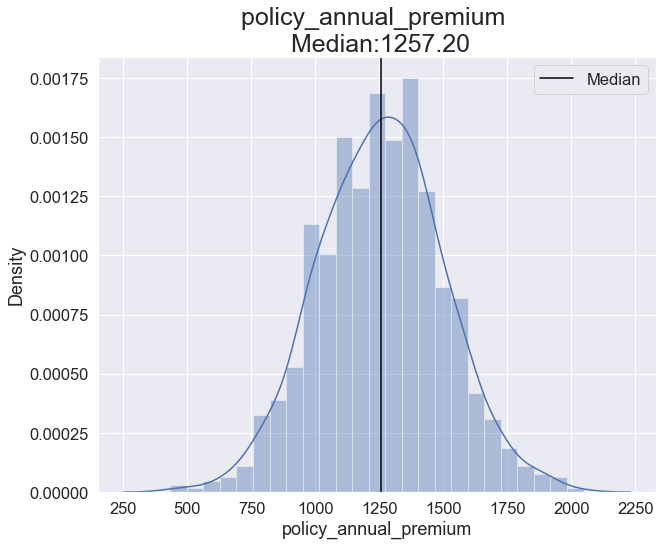

In [21]:
plt.figure(figsize=(10,8))
sns.distplot(df['policy_annual_premium'])
plt.title('policy_annual_premium \n Median:{0:.2f}'.format(df['policy_annual_premium'].median()),size=25)
plt.axvline(df['policy_annual_premium'].median(),color='black',label='Median')
plt.legend()

looks like its normally distributed with median value of 1250

In [22]:
df.head()

,months_as_customer,age,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,...,auto_make,auto_model,auto_year,fraud_reported,policy_bind_day,policy_bind_month,policy_bind_year,incident_day,incident_month,incident_year
0,328,48,OH,250/500,1000,1406.91,0,466132,MALE,MD,...,Saab,92x,2004,Y,17,10,2014,25,1,2015
1,228,42,IN,250/500,2000,1197.22,5000000,468176,MALE,MD,...,Mercedes,E400,2007,Y,27,6,2006,21,1,2015
2,134,29,OH,100/300,2000,1413.14,5000000,430632,FEMALE,PhD,...,Dodge,RAM,2007,N,6,9,2000,22,2,2015
3,256,41,IL,250/500,2000,1415.74,6000000,608117,FEMALE,PhD,...,Chevrolet,Tahoe,2014,Y,25,5,1990,10,1,2015
4,228,44,IL,500/1000,1000,1583.91,6000000,610706,MALE,Associate,...,Accura,RSX,2009,N,6,6,2014,17,2,2015


__umbrella_limit__

In [23]:
df.umbrella_limit.value_counts()

 0           798
 6000000      57
 5000000      46
 4000000      39
 7000000      29
 3000000      12
 8000000       8
 9000000       5
 2000000       3
 10000000      2
-1000000       1
Name: umbrella_limit, dtype: int64

__insured_zip__

In [24]:
df.insured_zip.value_counts()

446895    2
456602    2
477695    2
469429    2
431202    2
         ..
468313    1
474360    1
476502    1
460895    1
454656    1
Name: insured_zip, Length: 995, dtype: int64

In [25]:
#this is the zip code of area so lets drop this
df.drop(['insured_zip'],axis=1,inplace=True)

In [26]:
df.head()

,months_as_customer,age,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,insured_occupation,...,auto_make,auto_model,auto_year,fraud_reported,policy_bind_day,policy_bind_month,policy_bind_year,incident_day,incident_month,incident_year
0,328,48,OH,250/500,1000,1406.91,0,MALE,MD,craft-repair,...,Saab,92x,2004,Y,17,10,2014,25,1,2015
1,228,42,IN,250/500,2000,1197.22,5000000,MALE,MD,machine-op-inspct,...,Mercedes,E400,2007,Y,27,6,2006,21,1,2015
2,134,29,OH,100/300,2000,1413.14,5000000,FEMALE,PhD,sales,...,Dodge,RAM,2007,N,6,9,2000,22,2,2015
3,256,41,IL,250/500,2000,1415.74,6000000,FEMALE,PhD,armed-forces,...,Chevrolet,Tahoe,2014,Y,25,5,1990,10,1,2015
4,228,44,IL,500/1000,1000,1583.91,6000000,MALE,Associate,sales,...,Accura,RSX,2009,N,6,6,2014,17,2,2015


__insured_sex__

<AxesSubplot:xlabel='insured_sex', ylabel='count'>

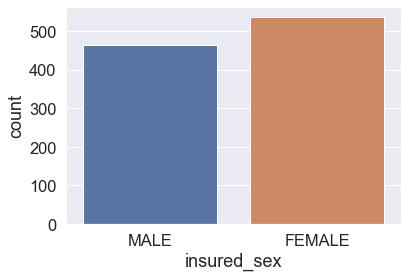

In [27]:
sns.countplot(df.insured_sex)

In [28]:
countmale = len(df[df.insured_sex == 'MALE'])
print("Percentage of male: {:.2f}%".format((countmale / (len(df.insured_sex))*100)))
countfemale = len(df[df.insured_sex == 'FEMALE'])
print("Percentage of FEMALE: {:.2f}%".format((countfemale / (len(df.insured_sex))*100)))

Percentage of male: 46.30%
Percentage of FEMALE: 53.70%


__females are more in the data set than male__

__insured_education_level__

In [29]:
df.insured_education_level.value_counts()

JD             161
High School    160
Associate      145
MD             144
Masters        143
PhD            125
College        122
Name: insured_education_level, dtype: int64

<AxesSubplot:xlabel='insured_education_level', ylabel='count'>

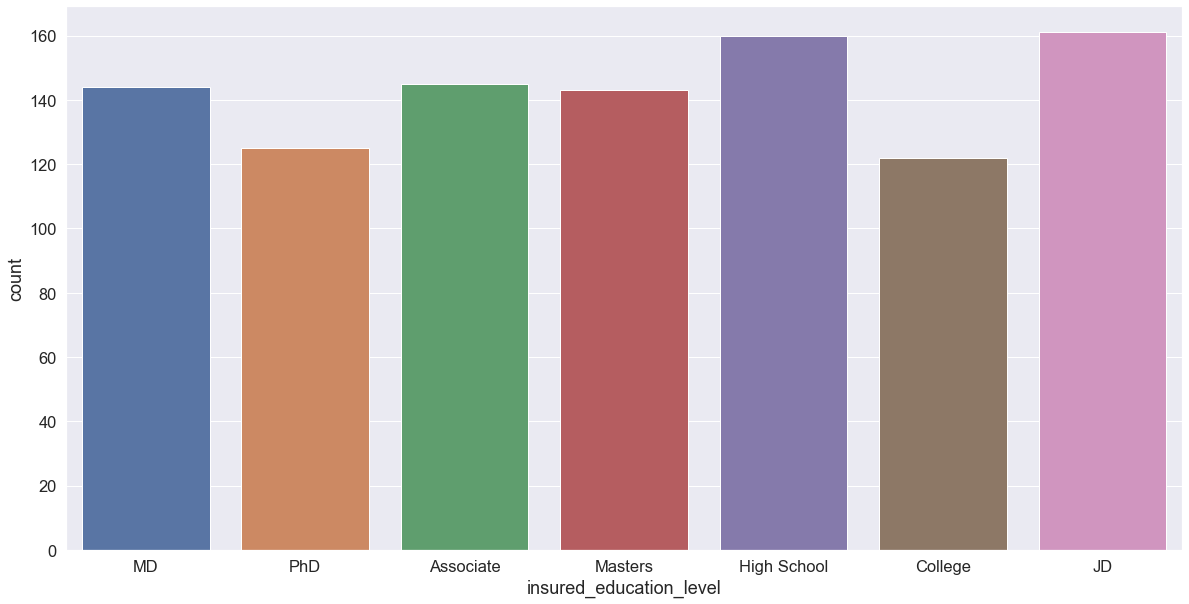

In [30]:
plt.figure(figsize=(20,10))
sns.countplot(df.insured_education_level)

high school and jd are at top, rest all have almost equal count 

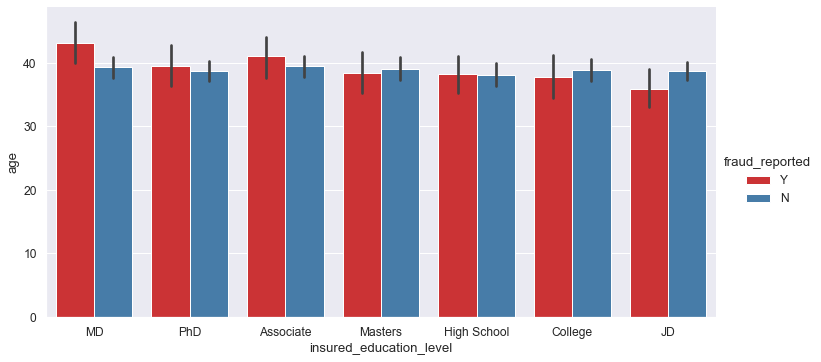

In [31]:
sns.set(font_scale=1.1)
sns.catplot(x='insured_education_level',y='age',hue='fraud_reported',data=df,kind='bar',aspect=2,palette='Set1')

In [32]:
df.head()

,months_as_customer,age,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,insured_occupation,...,auto_make,auto_model,auto_year,fraud_reported,policy_bind_day,policy_bind_month,policy_bind_year,incident_day,incident_month,incident_year
0,328,48,OH,250/500,1000,1406.91,0,MALE,MD,craft-repair,...,Saab,92x,2004,Y,17,10,2014,25,1,2015
1,228,42,IN,250/500,2000,1197.22,5000000,MALE,MD,machine-op-inspct,...,Mercedes,E400,2007,Y,27,6,2006,21,1,2015
2,134,29,OH,100/300,2000,1413.14,5000000,FEMALE,PhD,sales,...,Dodge,RAM,2007,N,6,9,2000,22,2,2015
3,256,41,IL,250/500,2000,1415.74,6000000,FEMALE,PhD,armed-forces,...,Chevrolet,Tahoe,2014,Y,25,5,1990,10,1,2015
4,228,44,IL,500/1000,1000,1583.91,6000000,MALE,Associate,sales,...,Accura,RSX,2009,N,6,6,2014,17,2,2015


__insured_occupation__

In [33]:
df.insured_occupation.value_counts()

machine-op-inspct    93
prof-specialty       85
tech-support         78
exec-managerial      76
sales                76
craft-repair         74
transport-moving     72
priv-house-serv      71
other-service        71
armed-forces         69
adm-clerical         65
protective-serv      63
handlers-cleaners    54
farming-fishing      53
Name: insured_occupation, dtype: int64

<AxesSubplot:xlabel='insured_occupation', ylabel='count'>

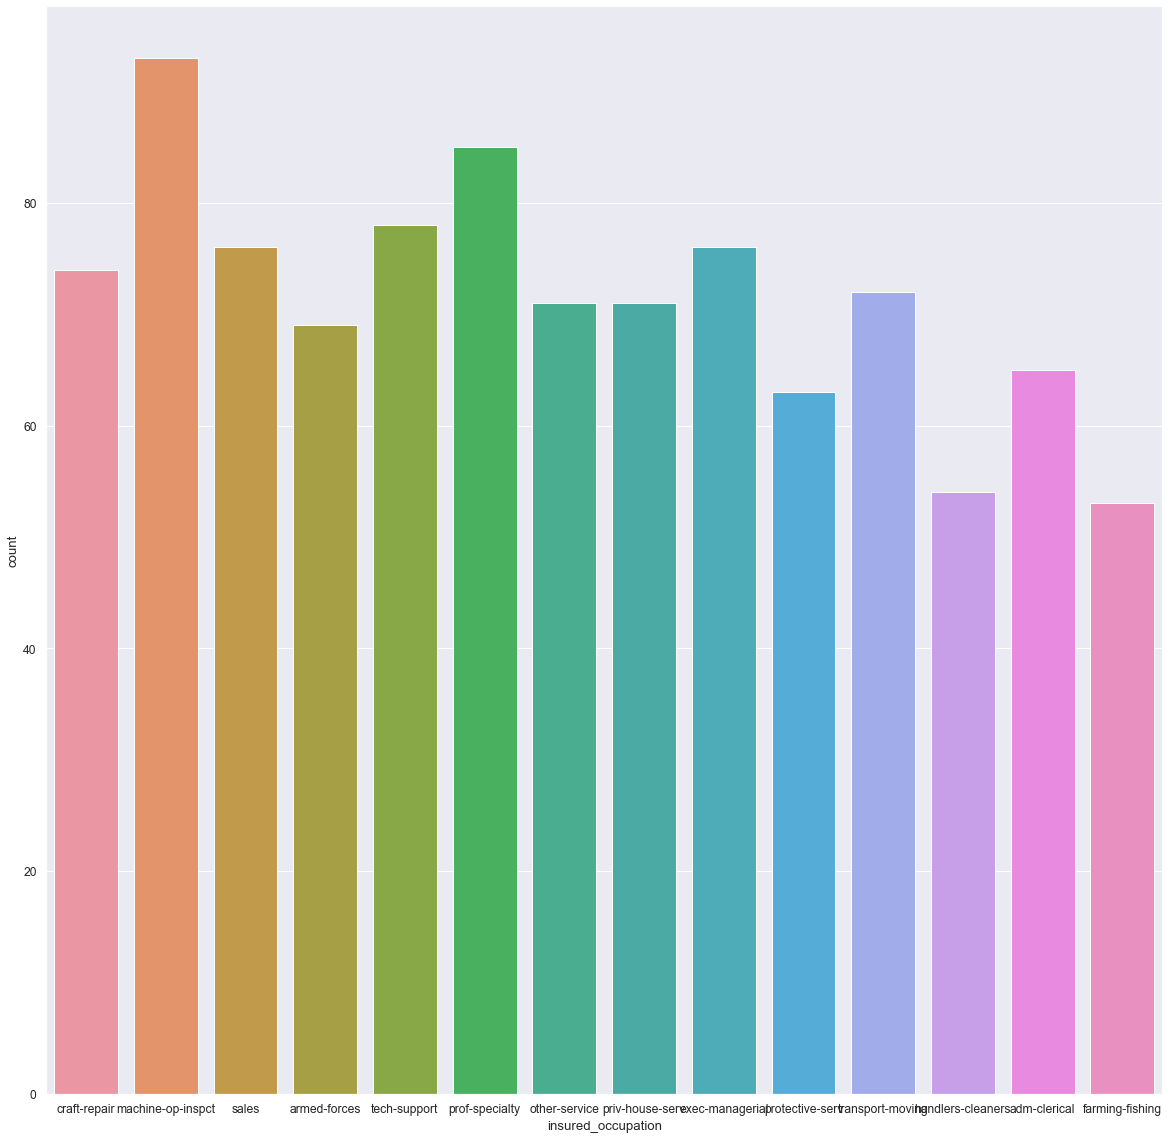

In [34]:
plt.figure(figsize=(20,20))
sns.countplot(df.insured_occupation)

__machine-op-inspct has 93 value count and rest other have almost same count__


__insured_hobbies__

In [35]:
df.insured_hobbies.value_counts()

reading           64
paintball         57
exercise          57
bungie-jumping    56
movies            55
camping           55
golf              55
kayaking          54
yachting          53
hiking            52
video-games       50
skydiving         49
base-jumping      49
board-games       48
polo              47
chess             46
dancing           43
sleeping          41
cross-fit         35
basketball        34
Name: insured_hobbies, dtype: int64

__insured_relationship__

In [36]:
df.insured_relationship.value_counts()

own-child         183
other-relative    177
not-in-family     174
husband           170
wife              155
unmarried         141
Name: insured_relationship, dtype: int64

<AxesSubplot:xlabel='insured_relationship', ylabel='count'>

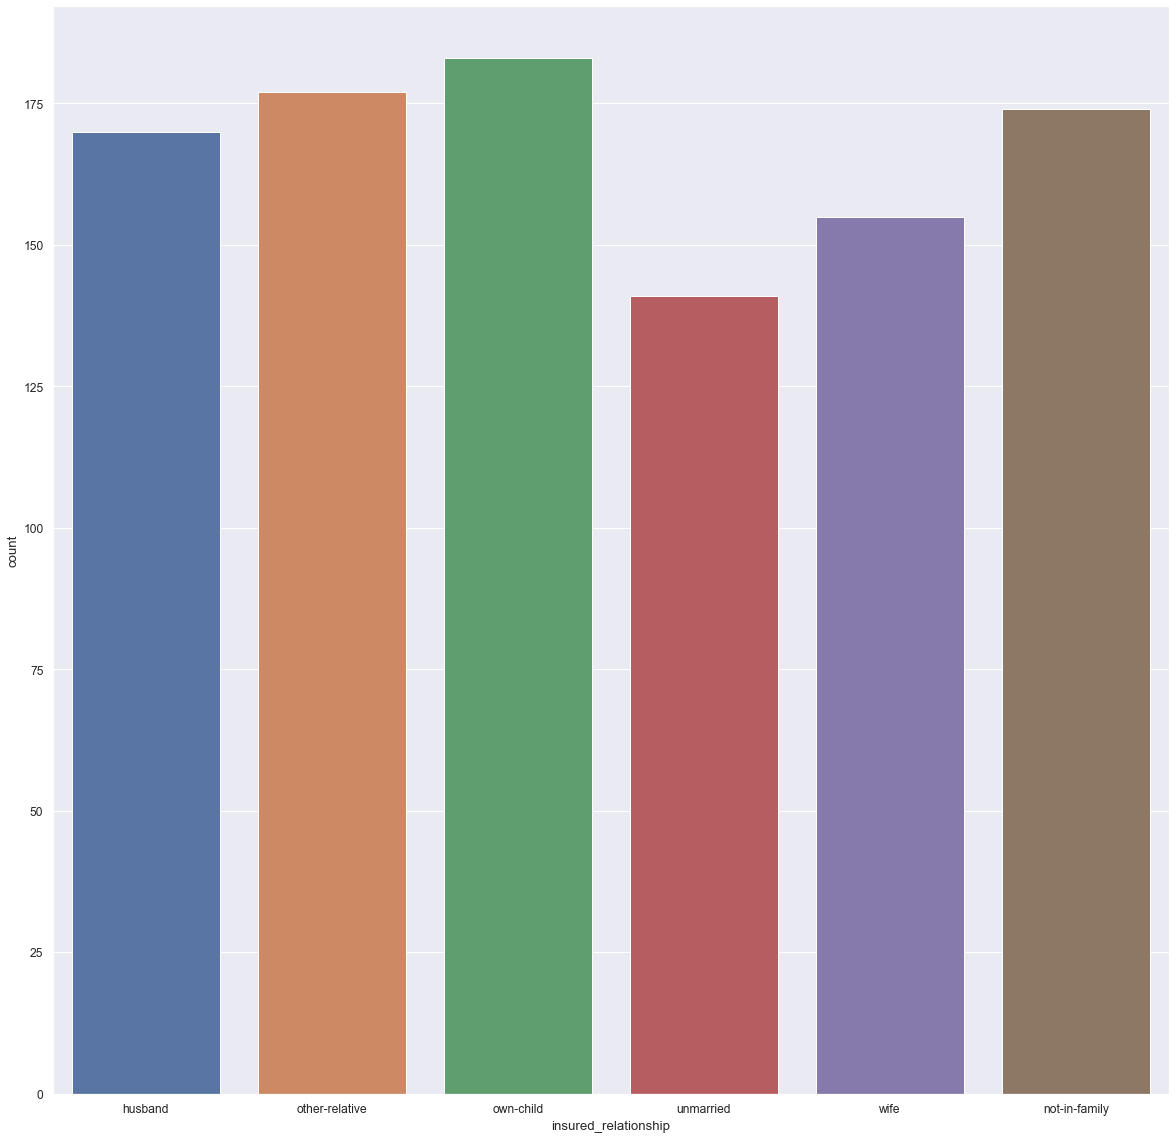

In [37]:
plt.figure(figsize=(20,20))
sns.countplot(df.insured_relationship)

all looks fine ,almost equal

__incident_type__

In [38]:
df.incident_type.value_counts()

Multi-vehicle Collision     419
Single Vehicle Collision    403
Vehicle Theft                94
Parked Car                   84
Name: incident_type, dtype: int64

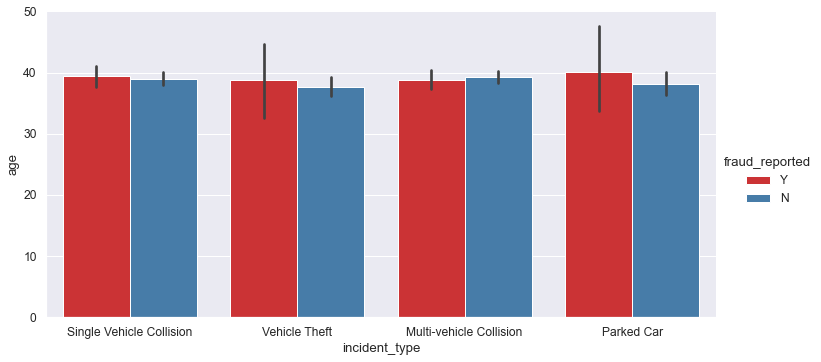

In [39]:
sns.catplot(x='incident_type',y='age',hue='fraud_reported',data=df,kind='bar',aspect=2,palette='Set1')


all incidents type have noth fraud and not fraids equaly distributed

__collision_type__

In [40]:
df.collision_type.value_counts()

Rear Collision     292
Side Collision     276
Front Collision    254
?                  178
Name: collision_type, dtype: int64

In [41]:
df['collision_type'].replace(['?'],['None'],inplace=True)


__incident_severity__

In [42]:
df.incident_severity.value_counts()

Minor Damage      354
Total Loss        280
Major Damage      276
Trivial Damage     90
Name: incident_severity, dtype: int64

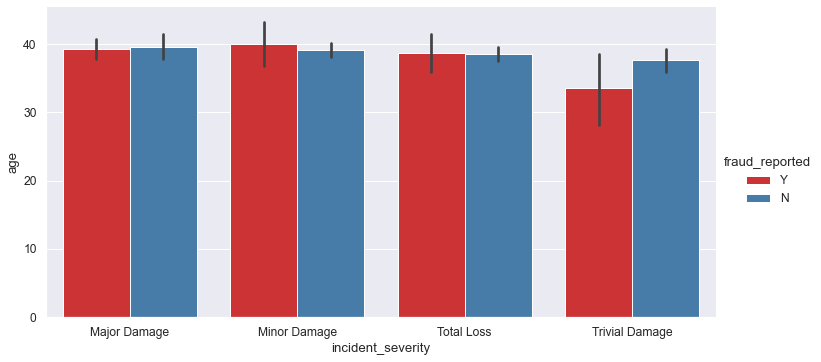

In [43]:
sns.catplot(x='incident_severity',y='age',hue='fraud_reported',data=df,kind='bar',aspect=2,palette='Set1')


__authorities_contacted__ 

In [44]:
df.authorities_contacted.value_counts()

Police       292
Fire         223
Other        198
Ambulance    196
None          91
Name: authorities_contacted, dtype: int64

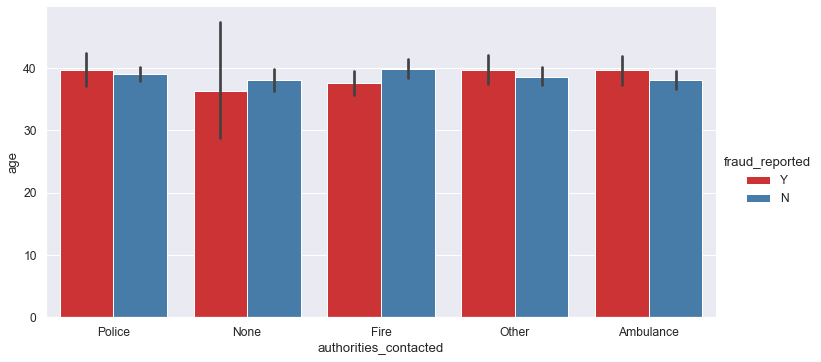

In [45]:
sns.catplot(x='authorities_contacted',y='age',hue='fraud_reported',data=df,kind='bar',aspect=2,palette='Set1')


__incident_state__

In [46]:
df.incident_state.value_counts()

NY    262
SC    248
WV    217
NC    110
VA    110
PA     30
OH     23
Name: incident_state, dtype: int64

__incident_city__

In [47]:
df.incident_city.value_counts()

Springfield    157
Arlington      152
Columbus       149
Northbend      145
Hillsdale      141
Riverwood      134
Northbrook     122
Name: incident_city, dtype: int64

__incident_hour_of_the_day__       

In [48]:
df.incident_hour_of_the_day.value_counts()

17    54
3     53
0     52
23    51
16    49
4     46
13    46
10    46
6     44
9     43
14    43
21    42
18    41
7     40
19    40
12    40
15    39
22    38
8     36
20    34
5     33
2     31
11    30
1     29
Name: incident_hour_of_the_day, dtype: int64

In [49]:
def deparrtime(x):
    tt=x
    if(tt>=16 and tt<21):
        x='Evening'
    elif(tt>=21 or tt<5):
        x='Night'
    elif(tt>=5 and tt<11):
        x='Morning'
    elif(tt>=11 and tt<16):
        x='Afternoon'
    return x
df['incident_hour_of_the_day']=df['incident_hour_of_the_day'].apply(deparrtime)

In [50]:
df.incident_hour_of_the_day.value_counts()

Night        342
Morning      242
Evening      218
Afternoon    198
Name: incident_hour_of_the_day, dtype: int64

__number_of_vehicles_involved__

In [51]:
df.number_of_vehicles_involved.value_counts()

1    581
3    358
4     31
2     30
Name: number_of_vehicles_involved, dtype: int64

__property_damage__

In [52]:
df.property_damage.value_counts()

?      360
NO     338
YES    302
Name: property_damage, dtype: int64

In [53]:
df['property_damage'].replace(['?'],['None'],inplace=True)


In [54]:
df.property_damage.value_counts()

None    360
NO      338
YES     302
Name: property_damage, dtype: int64

__bodily_injuries__

In [55]:
df.bodily_injuries.value_counts()

0    340
2    332
1    328
Name: bodily_injuries, dtype: int64

__witnesses__

In [56]:
df.witnesses.value_counts()

1    258
2    250
0    249
3    243
Name: witnesses, dtype: int64

__police_report_available__

In [57]:
df.police_report_available.value_counts()

NO     343
?      343
YES    314
Name: police_report_available, dtype: int64

In [58]:
df['police_report_available'].replace(['?'],['None'],inplace=True)


In [59]:
df.police_report_available.value_counts()

NO      343
None    343
YES     314
Name: police_report_available, dtype: int64

__total_claim_amount__

In [60]:
df.total_claim_amount.value_counts()

59400    5
75400    4
60600    4
2640     4
58500    4
        ..
57970    1
41580    1
45180    1
3690     1
71680    1
Name: total_claim_amount, Length: 763, dtype: int64

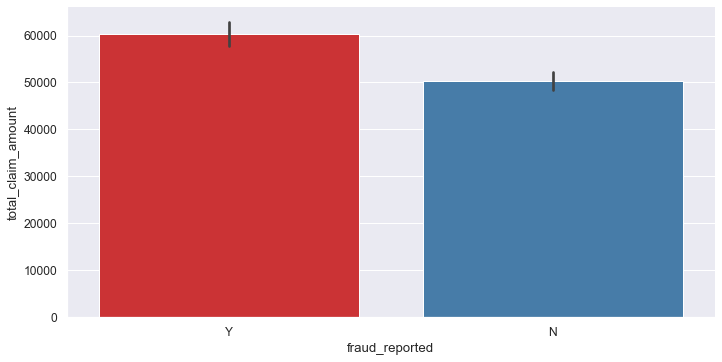

In [61]:
sns.catplot(y='total_claim_amount',x='fraud_reported',data=df,kind='bar',aspect=2,palette='Set1')


From the above we can see that upto 60,000 claim amount was reported as fraud.



KeyError: '"total_claim_amount"'

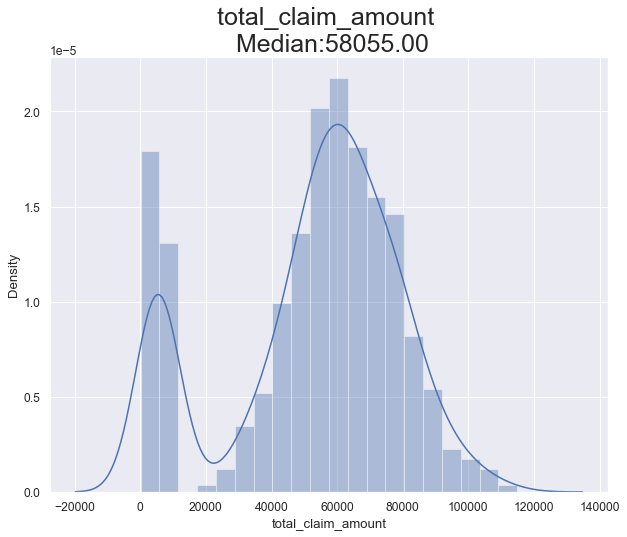

In [62]:
plt.figure(figsize=(10,8))
sns.distplot(df['total_claim_amount'])
plt.title('total_claim_amount \n Median:{0:.2f}'.format(df['total_claim_amount'].median()),size=25)
plt.axvline(df['"total_claim_amount"'].median(),color='black',label='Median')
plt.legend()

In [ ]:
plt.figure(figsize=(10,8))
sns.boxplot(df["total_claim_amount"])


__injury_claim__

In [ ]:
df.injury_claim.value_counts()

__property_claim __

In [ ]:
df.property_claim.value_counts()

__vehicle_claim__

In [ ]:
df.vehicle_claim.value_counts()

In [ ]:
sns.catplot(y='vehicle_claim',x='collision_type',hue='police_report_available',data=df,kind='bar',aspect=2,palette='Set1')


From the above we can see that in most of cases police report was not available which can lead to fraud as collision should be reported, and major collisions were side and front collision.



__auto_make__

In [ ]:
df.auto_make.value_counts()

__auto_model__

In [ ]:
df.auto_model.value_counts()

__auto_year__

In [ ]:
df.auto_year.value_counts()

__capital-loss__

In [ ]:
df_pd = pd.DataFrame(df)

In [ ]:
df_pd.rename(columns ={'capital-gains':'capitalgains','capital-loss':'capitalloss'},inplace=True)

In [ ]:
df.info()

In [ ]:
df.capitalgains.value_counts()

In [ ]:
df.capitalloss.value_counts()

In [ ]:
sns.set(font_scale=1.5)
sns.relplot(x='capitalgains',y='age',hue='fraud_reported',data=df,aspect=2,palette='Set1')

# target value - "fraud_reported"

In [ ]:
df.fraud_reported.value_counts()

In [ ]:
countno= len(df[df.fraud_reported == 'N'])
print("Percentage of male: {:.2f}%".format((countno / (len(df.fraud_reported))*100)))
countyes = len(df[df.fraud_reported == 'Y'])
print("Percentage of FEMALE: {:.2f}%".format((countyes / (len(df.fraud_reported))*100)))

almost 75% male are fraud in automobile insurance as male usualy run automobile

In [ ]:
plt.figure(figsize=(10,10))
sns.countplot(df.fraud_reported)

# Lets Check the Correlation.


In [ ]:
plt.figure(figsize=(30,30))
sns.heatmap(df.corr(), annot=True)


From the above we can see that total claim amount,injury claim,property claim and vehicle claim are highly correlated with each other, few of the features are slightly correlated with eachother.

In [ ]:
df.head()

In [ ]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['policy_state']=le.fit_transform(df['policy_state'])
df['policy_csl']=le.fit_transform(df['policy_csl'])
df['insured_sex']=le.fit_transform(df['insured_sex'])
df['insured_education_level']=le.fit_transform(df['insured_education_level'])
df['insured_occupation']=le.fit_transform(df['insured_occupation'])
df['insured_hobbies']=le.fit_transform(df['insured_hobbies'])
df['insured_relationship']=le.fit_transform(df['insured_relationship'])
df['incident_type']=le.fit_transform(df['incident_type'])
df['collision_type']=le.fit_transform(df['collision_type'])
df['incident_severity']=le.fit_transform(df['incident_severity'])
df['authorities_contacted']=le.fit_transform(df['authorities_contacted'])
df['incident_state']=le.fit_transform(df['incident_state'])
df['incident_city']=le.fit_transform(df['incident_city'])
df['incident_hour_of_the_day']=le.fit_transform(df['incident_hour_of_the_day'])
df['property_damage']=le.fit_transform(df['property_damage'])
df['police_report_available']=le.fit_transform(df['police_report_available'])
df['auto_make']=le.fit_transform(df['auto_make'])
df['auto_model']=le.fit_transform(df['auto_model'])
df['fraud_reported']=le.fit_transform(df['fraud_reported'])
df['policy_deductable']=le.fit_transform(df['policy_deductable'])
df['umbrella_limit']=le.fit_transform(df['umbrella_limit'])
df['incident_hour_of_the_day']=le.fit_transform(df['incident_hour_of_the_day'])      

In [ ]:
df.head()

In [ ]:
df.info()

In [ ]:
x=df.drop(['fraud_reported'],axis=1)
x.head()

In [ ]:
y=df['fraud_reported']
y.head()

In [ ]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
x=ss.fit_transform(x)

In [ ]:
from sklearn.model_selection import train_test_split,cross_val_score
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=60,stratify=y)

In [ ]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,AdaBoostClassifier,ExtraTreesClassifier
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,roc_curve,auc

In [ ]:
KNN=KNeighborsClassifier()
SV=SVC()
LR=LogisticRegression()
DT=DecisionTreeClassifier(random_state=60)
GNB=GaussianNB()
RFC=RandomForestClassifier(n_estimators=200,random_state=60)
GBC=GradientBoostingClassifier(n_estimators=200,random_state=60)
ABC=AdaBoostClassifier(random_state=60)
ETC=ExtraTreesClassifier(random_state=60)

In [ ]:
models = []
models.append(('KNeighborsClassifier', KNN))
models.append(('SVC', SV))
models.append(('LogisticRegression', LR))
models.append(('DecisionTreeClassifier', DT))
models.append(('GaussianNB', GNB))
models.append(('RandomForestClassifier', RFC))
models.append(('GradientBoostingClassifier', GBC))
models.append(('ExtraTreesClassifier',ETC))
models.append(('AdaBoostClassifier',ABC))

In [ ]:
Model = []
score = []
cvs=[]
rocscore=[]
for name,model in models:
    print('***********************',name,'***********************')
    print('\n')
    Model.append(name)
    model.fit(x_train,y_train)
    print(model)
    pre=model.predict(x_test)
    print('\n')
    AS=accuracy_score(y_test,pre)
    print('Accuracy_score = ',AS)
    score.append(AS*100)
    print('\n')
    sc = cross_val_score(model, x, y, cv=10, scoring='accuracy').mean()
    print('Cross_Val_Score = ',sc)
    cvs.append(sc*100)
    print('\n')
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test,pre)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    print ('roc_auc_score = ',roc_auc)
    rocscore.append(roc_auc*100)
    print('\n')
    print('classification_report\n',classification_report(y_test,pre))
    print('\n')
    cm=confusion_matrix(y_test,pre)
    print(cm)
    print('\n')
    plt.figure(figsize=(10,40))
    plt.subplot(911)
    plt.title(name)
    print(sns.heatmap(cm,annot=True))
    plt.subplot(912)
    plt.title(name)
    plt.plot(false_positive_rate, true_positive_rate, label='AUC = %0.2f'% roc_auc)
    plt.plot([0,1],[0,1],'r--')
    plt.legend(loc='lower right')
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    print('\n\n')

In [ ]:
result = pd.DataFrame({'Model': Model, 'Accuracy_score': score ,'Cross_val_score':cvs,'Roc_auc_curve':rocscore})
result

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
param_dict = {
    'C':[1.0,10,100],
    'kernel':['rbg','linear'],
    'gamma':['scale',0.1,0.01,0.001]
    
}

In [ ]:
gs_model = GridSearchCV(SVC(),param_grid=param_dict,verbose=2)

In [ ]:
gs_model.fit(x_train,y_train)

In [ ]:
gs_model.best_estimator_

In [ ]:
gs_model.best_params_

In [ ]:
gs_model.best_score_